# Predicting ship collisions in the arctic sea

In [2]:
#Import Libraries
#Using: file:///C:/Users/shayl/Downloads/2018_Marine%20transportation%20risk%20assessment%20using%20Bayesian%20Network%20(1).pdf
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gumimage
import itertools

**Regarding the function below**<br>
The getIterations function takes in an array of items that would be the inputs to the "or" gate in the Fault Tree, The variable that would be the output to the fault tree and then the decision network itself

In [3]:
#Helper methods
def count(items):
    num = 0
    for i in items:
        if i == 1:
            num = num+1
    if num<len(items)/2: #Check if should be < or <=
        return True
    else:
        return False

def getIterations(vars, mainVariable, bn):
    lst = list(itertools.product([0, 1], repeat=len(vars)))
    items = {}
    for i in lst:
        for j in range(len(vars)):
            items[vars[j]] = i[j]
        #print("Method insert for", mainVariable, "dictionary is", items, "with probabilities", "[1-0.00004396, 0.00004396]")
        bn.cpt(mainVariable)[items] = [1-0.00004396, 0.00004396]
        #print(items)
        #if count(i):
            #print("Method insert for", mainVariable, "dictionary is", items, "with probabilities 0.42")
            #bn.cpt(mainVariable)[items] = [1-0.00004396, 0.00004396]
        #else:
            #print("Method insert for",mainVariable, "dictionary is", items, "with probabilities 0.42")
            #bn.cpt(mainVariable)[items] = [1-0.00004396, 0.00004396]

# Construction

## Define Nodes

In [4]:
#Define Nodes
bn = gum.BayesNet()
#Regular Nodes
var_names = ["Waves", "HighWind", "Fog", "PackIce", "RidgeIceAndIceberg", "Collision", "Environment", "HighSpeed", "EquipmentError", "RadarFailure", "HumanError", "ShipFault", "Navigation", "ChangeCourse"]
waves, highwind, fog, packice, ridgeiceandiceberg, collision, environment, highspeed, equipmenterror, radarfailure, humanerror, shipfault, navigation, changecourse= [bn.add(gum.LabelizedVariable(name, name, 2)) for name in var_names]
#The above are binary variables, region isn't so do that manually:
region = bn.add(gum.LabelizedVariable("Region", "Region", ["region1", "region2", "region3", "region4", "region5"]))
gnb.showBN(bn,size="15")

## Arcs

Add in Arcs

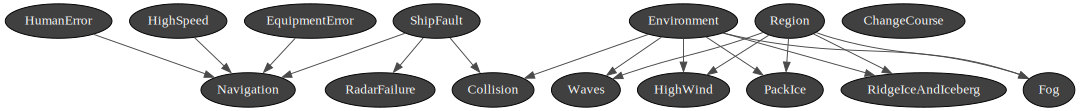

In [5]:
bn.addArc(region, waves)
bn.addArc(region, highwind)
bn.addArc(region, fog)
bn.addArc(region, packice)
bn.addArc(region, ridgeiceandiceberg)

bn.addArc(environment, waves)
bn.addArc(environment, highwind)
bn.addArc(environment, fog)
bn.addArc(environment, packice)
bn.addArc(environment, ridgeiceandiceberg)

bn.addArc(shipfault, navigation)
bn.addArc(shipfault, radarfailure)
bn.addArc(humanerror, navigation)
bn.addArc(equipmenterror, navigation)
bn.addArc(highspeed, navigation)
bn.addArc(environment, collision)
bn.addArc(shipfault, collision)
gnb.showBN(bn,size="15")


# CPTs


## CPT Region


For "Navigation" Effect I used the idea from this paper (https://reader.elsevier.com/reader/sd/pii/S0951832000000776?token=26EF05B58BEE12E1BFA7AF8C03ADFFF4715762438DDD0922D73E499AD84F80A194F925EA79A8B74025BECAE7F242470D&originRegion=eu-west-1&originCreation=20230504070556) as all gates represent causal relationships - therefore either true or false

In [6]:
#For Region
bn.cpt("Region").fillWith([1/5, 1/5, 1/5, 1/5, 1/5])
bn.cpt("Region")

(pyAgrum.Potential<double>@0000026B39AA2030) 
  Region                                         |
region1  |region2  |region3  |region4  |region5  |
---------|---------|---------|---------|---------|
 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |

## CPTs for oberserved nodes

PackIce

In [7]:
bn.cpt("PackIce")[{"Region":"region1", "Environment":0}] = [1-0.0053, 0.0053]
bn.cpt("PackIce")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("PackIce")[{"Region":"region3", "Environment":0}] = [1-0.0037, 0.0037]
bn.cpt("PackIce")[{"Region":"region4", "Environment":0}] = [1-0.001, 0.001]
bn.cpt("PackIce")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
bn.cpt("PackIce")[{"Region":"region1", "Environment":1}] = [1-0.0053, 0.0053]
bn.cpt("PackIce")[{"Region":"region2", "Environment":1}] = [1-0.01, 0.01]
bn.cpt("PackIce")[{"Region":"region3", "Environment":1}] = [1-0.0037, 0.0037]
bn.cpt("PackIce")[{"Region":"region4", "Environment":1}] = [1-0.001, 0.001]
bn.cpt("PackIce")[{"Region":"region5", "Environment":1}] = [1-0.0001, 0.0001]
bn.cpt("PackIce")

(pyAgrum.Potential<double>@0000026B39AA25B0) 
             ||  PackIce          |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9963  | 0.0037  |
region|0     || 0.9990  | 0.0010  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.9947  | 0.0053  |
region|1     || 0.9900  | 0.0100  |
region|1     || 0.9963  | 0.0037  |
region|1     || 0.9990  | 0.0010  |
region|1     || 0.9999  | 0.0001  |

Fog (X7)

In [8]:
bn.cpt("Fog")[{"Region":"region1", "Environment":0}] = [1-0.05, 0.05]
bn.cpt("Fog")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("Fog")[{"Region":"region3", "Environment":0}] = [1-0.05, 0.05]
bn.cpt("Fog")[{"Region":"region4", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("Fog")[{"Region":"region5", "Environment":0}] = [1-0.0005, 0.0005]
bn.cpt("Fog")[{"Region":"region1", "Environment":1}] = [1-0.05, 0.05]
bn.cpt("Fog")[{"Region":"region2", "Environment":1}] = [1-0.01, 0.01]
bn.cpt("Fog")[{"Region":"region3", "Environment":1}] = [1-0.05, 0.05]
bn.cpt("Fog")[{"Region":"region4", "Environment":1}] = [1-0.01, 0.01]
bn.cpt("Fog")[{"Region":"region5", "Environment":1}] = [1-0.0005, 0.0005]
bn.cpt("Fog")

(pyAgrum.Potential<double>@0000026B39AA2650) 
             ||  Fog              |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9995  | 0.0005  |
region|1     || 0.9500  | 0.0500  |
region|1     || 0.9900  | 0.0100  |
region|1     || 0.9500  | 0.0500  |
region|1     || 0.9900  | 0.0100  |
region|1     || 0.9995  | 0.0005  |

RidgeIceAndIceberg (X14)

In [9]:
bn.cpt("RidgeIceAndIceberg")[{"Region":"region1", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region3", "Environment":0}] = [1-0.05, 0.05]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region4", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region5", "Environment":0}] = [1-0.005, 0.005]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region1", "Environment":1}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region2", "Environment":1}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region3", "Environment":1}] = [1-0.05, 0.05]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region4", "Environment":1}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region5", "Environment":1}] = [1-0.005, 0.005]
bn.cpt("RidgeIceAndIceberg")

(pyAgrum.Potential<double>@0000026B39AA1F70) 
             ||  RidgeIceAndIceber|
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9950  | 0.0050  |
region|1     || 0.9900  | 0.0100  |
region|1     || 0.9900  | 0.0100  |
region|1     || 0.9500  | 0.0500  |
region|1     || 0.9900  | 0.0100  |
region|1     || 0.9950  | 0.0050  |

Waves (X9)

In [10]:
bn.cpt("Waves")[{"Region":"region1", "Environment":0}] = [1-0.0023, 0.0023]
bn.cpt("Waves")[{"Region":"region2", "Environment":0}] = [1-0.0053, 0.0053]
bn.cpt("Waves")[{"Region":"region3", "Environment":0}] = [1-0.001, 0.001]
bn.cpt("Waves")[{"Region":"region4", "Environment":0}] = [1-0.00083, 0.00083]
bn.cpt("Waves")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
bn.cpt("Waves")[{"Region":"region1", "Environment":1}] = [1-0.0023, 0.0023]
bn.cpt("Waves")[{"Region":"region2", "Environment":1}] = [1-0.0053, 0.0053]
bn.cpt("Waves")[{"Region":"region3", "Environment":1}] = [1-0.001, 0.001]
bn.cpt("Waves")[{"Region":"region4", "Environment":1}] = [1-0.00083, 0.00083]
bn.cpt("Waves")[{"Region":"region5", "Environment":1}] = [1-0.0001, 0.0001]
bn.cpt("Waves")

(pyAgrum.Potential<double>@0000026B39AA2690) 
             ||  Waves            |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9977  | 0.0023  |
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9990  | 0.0010  |
region|0     || 0.9992  | 0.0008  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.9977  | 0.0023  |
region|1     || 0.9947  | 0.0053  |
region|1     || 0.9990  | 0.0010  |
region|1     || 0.9992  | 0.0008  |
region|1     || 0.9999  | 0.0001  |

HighWind (X8)

In [11]:
bn.cpt("HighWind")[{"Region":"region1", "Environment":0}] = [1-0.0017, 0.0017]
bn.cpt("HighWind")[{"Region":"region2", "Environment":0}] = [1-0.0053, 0.0053]
bn.cpt("HighWind")[{"Region":"region3", "Environment":0}] = [1-0.0017, 0.0017]
bn.cpt("HighWind")[{"Region":"region4", "Environment":0}] = [1-0.0005, 0.0005]
bn.cpt("HighWind")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
bn.cpt("HighWind")[{"Region":"region1", "Environment":1}] = [1-0.0017, 0.0017]
bn.cpt("HighWind")[{"Region":"region2", "Environment":1}] = [1-0.0053, 0.0053]
bn.cpt("HighWind")[{"Region":"region3", "Environment":1}] = [1-0.0017, 0.0017]
bn.cpt("HighWind")[{"Region":"region4", "Environment":1}] = [1-0.0005, 0.0005]
bn.cpt("HighWind")[{"Region":"region5", "Environment":1}] = [1-0.0001, 0.0001]
bn.cpt("HighWind")

(pyAgrum.Potential<double>@0000026B39AA2390) 
             ||  HighWind         |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9983  | 0.0017  |
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9983  | 0.0017  |
region|0     || 0.9995  | 0.0005  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.9983  | 0.0017  |
region|1     || 0.9947  | 0.0053  |
region|1     || 0.9983  | 0.0017  |
region|1     || 0.9995  | 0.0005  |
region|1     || 0.9999  | 0.0001  |

HighSpeed (X2)

In [12]:
bn.cpt("HighSpeed").fillWith([1-0.0068, 0.0068])

(pyAgrum.Potential<double>@0000026B39AA2610) 
  HighSpeed        |
0        |1        |
---------|---------|
 0.9932  | 0.0068  |

EquipmentError (X3)

In [13]:
bn.cpt("EquipmentError").fillWith([1-0.008563, 0.008563])

(pyAgrum.Potential<double>@0000026B39AA2290) 
  EquipmentError   |
0        |1        |
---------|---------|
 0.9914  | 0.0086  |

HumanError (X5)

In [14]:
bn.cpt("HumanError").fillWith([1-0.0074, 0.0074])

(pyAgrum.Potential<double>@0000026B39AA2110) 
  HumanError       |
0        |1        |
---------|---------|
 0.9926  | 0.0074  |

RadarFailure (X4)

In [15]:
bn.cpt("RadarFailure")[{"ShipFault":0}] = [1-0.0234, 0.0234]
bn.cpt("RadarFailure")[{"ShipFault":1}] = [1-0.0234, 0.0234]
bn.cpt("RadarFailure")

(pyAgrum.Potential<double>@0000026B39AA22B0) 
      ||  RadarFailure     |
ShipFa||0        |1        |
------||---------|---------|
0     || 0.9766  | 0.0234  |
1     || 0.9766  | 0.0234  |

## CPT for conditionals

Navigation

In [16]:
vars = ["HumanError", "HighSpeed", "EquipmentError", "ShipFault"]
getIterations(vars, "Navigation", bn)
print("The below rounds to 4 decimal places but it is correct!")
bn.cpt("Navigation")


The below rounds to 4 decimal places but it is correct!


(pyAgrum.Potential<double>@0000026B39AA21F0) 
                           ||  Navigation       |
ShipFa|HumanE|Equipm|HighSp||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     |0     || 1.0000  | 0.0000  |
0     |1     |0     |0     || 1.0000  | 0.0000  |
1     |1     |0     |0     || 1.0000  | 0.0000  |
0     |0     |1     |0     || 1.0000  | 0.0000  |
1     |0     |1     |0     || 1.0000  | 0.0000  |
[...4 more line(s) ...]
0     |1     |0     |1     || 1.0000  | 0.0000  |
1     |1     |0     |1     || 1.0000  | 0.0000  |
0     |0     |1     |1     || 1.0000  | 0.0000  |
1     |0     |1     |1     || 1.0000  | 0.0000  |
0     |1     |1     |1     || 1.0000  | 0.0000  |
1     |1     |1     |1     || 1.0000  | 0.0000  |

ShipFault

Used "Mechanical failure" from table 2 of Marine transportation risk assessment using Bayesian Network: Application to Arctic waters"

In [17]:
bn.cpt("ShipFault").fillWith([1-0.000287, 0.000287])
bn.cpt("ShipFault")

(pyAgrum.Potential<double>@0000026B39AA1F10) 
  ShipFault        |
0        |1        |
---------|---------|
 0.9997  | 0.0003  |

Environment

In [18]:
bn.cpt("Environment").fillWith([1-0.4247, 0.4247])
bn.cpt("Environment")

(pyAgrum.Potential<double>@0000026B39AA1F50) 
  Environment      |
0        |1        |
---------|---------|
 0.5753  | 0.4247  |

Collision <br> Used Table 8 and 9 in "Marine Transportation Risk Assessment using Bayesian Network: Application to Arctic Waters"

In [19]:
bn.cpt("Collision")[{"ShipFault": 0,  "Environment": 0}]=[1, 0] #No Collision
bn.cpt("Collision")[{"ShipFault": 0,  "Environment": 1}]=[1-0.00502, 0.00502] #Average of table 9
bn.cpt("Collision")[{"ShipFault": 1,  "Environment": 0}]=[1-0.00224, 0.00224] #Average of table 8
bn.cpt("Collision")[{"ShipFault": 1,  "Environment": 1}]=[1-0.00363, 0.00363] #Average of table 8 and 9
bn.cpt("Collision")

(pyAgrum.Potential<double>@0000026B39AA2670) 
             ||  Collision        |
Enviro|ShipFa||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.9950  | 0.0050  |
0     |1     || 0.9978  | 0.0022  |
1     |1     || 0.9964  | 0.0036  |

BN{nodes: 15, arcs: 17, domainSize: 81920, dim: 82, mem: 1Ko 264o}


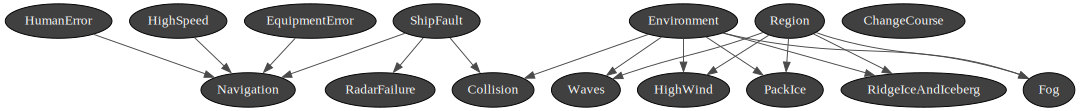

In [20]:
print(bn)
gnb.showBN(bn,size="15")